<a href="https://colab.research.google.com/github/maedehgourakani/MNIST/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install torchmetrics

In [102]:
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torch import optim

from torchvision.datasets import MNIST
from torchvision.transforms import Compose, RandomHorizontalFlip, RandomCrop, Normalize, ToTensor
from torchmetrics import Accuracy
from tqdm import tqdm

import matplotlib.pyplot as plt

In [60]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [100]:
_dataset = MNIST(root='./drive/MyDrive/deep_learning/mnist', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.7MB/s]


Extracting ./drive/MyDrive/deep_learning/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./drive/MyDrive/deep_learning/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 536kB/s]


Extracting ./drive/MyDrive/deep_learning/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./drive/MyDrive/deep_learning/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.51MB/s]


Extracting ./drive/MyDrive/deep_learning/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./drive/MyDrive/deep_learning/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.90MB/s]

Extracting ./drive/MyDrive/deep_learning/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./drive/MyDrive/deep_learning/mnist/MNIST/raw



In [62]:
# num of chanel, max and min of data, is it need to normalize?
_dataset.data.shape, _dataset.data.max(), _dataset.data.min()

(torch.Size([60000, 28, 28]),
 tensor(255, dtype=torch.uint8),
 tensor(0, dtype=torch.uint8))

In [63]:
mean = torch.FloatTensor(_dataset.data/_dataset.data.max()).mean()
std = torch.FloatTensor(_dataset.data/_dataset.data.max()).std()
img_size = _dataset.data.shape[1]

mean, std

(tensor(0.1307), tensor(0.3081))

In [64]:
# augementation

train_trans = Compose([
    RandomCrop(img_size, padding=1),
    RandomHorizontalFlip(p=0.5),
    ToTensor(),
    Normalize(mean, std)
])

# normalize by mean and std of train_dataset, without do something like crop or....
valid_trans = Compose([
    ToTensor(),
    Normalize(mean, std)
])

In [65]:
train_set = MNIST(root='./drive/MyDrive/deep_learning/mnist', train=True, transform=train_trans)

valid_set = MNIST(root='./drive/MyDrive/deep_learning/mnist', train=False, transform=valid_trans)

train_set, valid_set

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./mnist/
     Split: Train
     StandardTransform
 Transform: Compose(
                RandomCrop(size=(28, 28), padding=1)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=0.13066047430038452, std=0.30810782313346863)
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./mnist/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=0.13066047430038452, std=0.30810782313346863)
            ))

**1-3**

In [66]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
validation_loader = DataLoader(valid_set, batch_size=256)

1-4

In [67]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

#2

In [68]:
def cnn_layer(in_channel, out_channel, kernel, stride):
  return nn.Sequential(
      nn.Conv2d(in_channel, out_channel, kernel_size=kernel, stride=stride, padding=1),
      nn.BatchNorm2d(out_channel),
      nn.ReLU()
  )

In [69]:
def cnn():
  return nn.Sequential(
      cnn_layer(1, 32, 3, 2),
      nn.MaxPool2d(2, 2),

      cnn_layer(32, 32, 3, 1),
      cnn_layer(32, 64, 1, 1),
      nn.MaxPool2d(2, 2),

      cnn_layer(64, 64, 3, 2),
      cnn_layer(64, 128, 1, 1),
      nn.MaxPool2d(2, 2),

      cnn_layer(128, 128, 3, 1),
      cnn_layer(128, 128, 1, 1),
      nn.MaxPool2d(2, 2),

      cnn_layer(128, 128, 3, 2),
      cnn_layer(128, 256, 1, 1),
      nn.MaxPool2d(2, 2),

      cnn_layer(256, 256, 3, 1),
      cnn_layer(256, 256, 1, 1),
      nn.MaxPool2d(2, 2),

      cnn_layer(256, 256, 3, 1),
      cnn_layer(256, 512,1, 1),
      nn.MaxPool2d(2, 2),

      cnn_layer(512, 512, 3, 1),
      cnn_layer(512, 512, 1, 1),
      nn.MaxPool2d(2, 2),

      cnn_layer(512, 512, 3, 2),
      cnn_layer(512, 1024, 1, 1),
      nn.MaxPool2d(2, 2),

      cnn_layer(1024, 1024, 3, 1),
      cnn_layer(1024, 1024, 1, 1),
      nn.AdaptiveAvgPool2d(output_size=(1, 1)),

      nn.Flatten(),

      nn.Linear(1024, 10)

  )

2-2

In [70]:
#train_set[0]

In [71]:
model = cnn().to(device)

In [72]:
x_batch, y_batch = next(iter(train_loader))

In [73]:
model(x_batch.to(device)).shape

torch.Size([64, 10])

2-3

In [74]:
sum([torch.numel(p) for p in model.parameters()])

17798506

#3

#4

#5

5-1

In [75]:
class Averaging:
  def __init__(self):
    self.sum = 0.
    self.counter = 0

  def cal_avg(self, val):
    self.sum += val
    self.counter += 1

    return self.sum/self.counter

  def reset(self):
    self.sum = 0.
    self.counter = 0

In [88]:
train_acc = Accuracy(task='multiclass', num_classes=len(train_set.classes)).to(device)
train_loss_avg = Averaging()

def train_one_epoch(model, data_loader, loss_fn, optimizer, epoch, device):
  train_acc.reset()
  train_loss_avg.reset()

  with tqdm(data_loader, desc=f"Epoch:{epoch}", unit=" batch") as trange:
    for x_batch, y_batch in trange:

      x_batch, y_batch = x_batch.to(device), y_batch.to(device)

      # Forward
      yp = model(x_batch)
      loss = loss_fn(yp, y_batch)

      # Bachward
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      train_acc(yp, y_batch.int())
      train_acc_val = train_acc.compute().item()

      train_loss_avg_val = train_loss_avg.cal_avg(loss.item())

      trange.set_postfix(accuracy=100 * train_acc_val, loss=train_loss_avg_val)

  return model, train_acc_val, train_loss_avg_val

Forward

In [89]:
valid_acc = Accuracy(task='multiclass', num_classes=len(train_set.classes)).to(device)
valid_loss_avg = Averaging()

def validation(model, data_loader, loss_fn, device):

  valid_loss_avg.reset()
  valid_acc.reset()

  for x_batch, y_batch in data_loader:
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)

    #forward
    yp = model(x_batch)
    loss = loss_fn(yp, y_batch)

    valid_acc(yp, y_batch.int())
    valid_acc_val = valid_acc.compute().item()

    valid_loss_avg_val = valid_loss_avg.cal_avg(loss.item())

  return valid_acc_val, valid_loss_avg_val

In [90]:
model2 = cnn().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=1e-2, weight_decay=1e-4)

In [91]:
mini_set_size = 0.1
_, mini_set = random_split(train_set, lengths=[1 - mini_set_size, mini_set_size])

#change to dataloder
mini_loader = DataLoader(mini_set, batch_size=64, shuffle=True)

In [92]:
for ep in range(3):
  model2, _, _ = train_one_epoch(model2, mini_loader, loss_fn, optimizer, ep, device)
  validation(model2, mini_loader, loss_fn, device)

Epoch:2: 100%|██████████| 94/94 [00:04<00:00, 19.55 batch/s, accuracy=81.8, loss=0.644]


5-4
به ازای لرنینگریت های [0.1,0.01,0.001,0.0001] کل داده آموزشی را به اندازه یک
ایپاک، ترین کنید.

In [93]:
for lr in [0.1, 0.01, 0.001, 0.0001]:
  print(f'\nlr: {lr}')
  model3 = cnn().to(device)
  optimizer3 = optim.SGD(model3.parameters(), lr=lr)
  loss_fn = nn.CrossEntropyLoss()
  for ep in range(1):
    model3, _, _ = train_one_epoch(model3, train_loader, loss_fn, optimizer3, ep, device)


lr: 0.1


Epoch:0: 100%|██████████| 938/938 [00:52<00:00, 17.70 batch/s, accuracy=84, loss=0.514]



lr: 0.01


Epoch:0: 100%|██████████| 938/938 [00:49<00:00, 18.82 batch/s, accuracy=82.1, loss=0.602]



lr: 0.001


Epoch:0: 100%|██████████| 938/938 [00:50<00:00, 18.62 batch/s, accuracy=43.4, loss=1.76]



lr: 0.0001


Epoch:0: 100%|██████████| 938/938 [00:49<00:00, 18.87 batch/s, accuracy=14, loss=2.28]


In [97]:
for wd in [0,1e-1, 1e-2, 1e-3]:
  print(f'\nwd: {wd}')
  model3 = cnn().to(device)
  optimizer3 = optim.SGD(model3.parameters(), lr=0.1, weight_decay=wd)
  loss_fn = nn.CrossEntropyLoss()

  for ep in range(1):
    model3, _, _ = train_one_epoch(model3, train_loader, loss_fn, optimizer3, ep, device)


wd: 0


Epoch:0: 100%|██████████| 938/938 [00:54<00:00, 17.12 batch/s, accuracy=83.8, loss=0.518]



wd: 0.1


Epoch:0: 100%|██████████| 938/938 [00:51<00:00, 18.29 batch/s, accuracy=31, loss=2.08]



wd: 0.01


Epoch:0: 100%|██████████| 938/938 [00:50<00:00, 18.46 batch/s, accuracy=80.6, loss=0.64]



wd: 0.001


Epoch:0: 100%|██████████| 938/938 [00:56<00:00, 16.69 batch/s, accuracy=84, loss=0.514]


wd = o, lr = 0.1

5-6

In [107]:
train_loss_hist, train_acc_hist = [], []
valid_loss_hist, valid_acc_hist = [], []

In [108]:
#main model

main_model = cnn().to(device)
loss_fn = nn.CrossEntropyLoss()
main_optimizer = optim.SGD(main_model.parameters(), lr=0.1, weight_decay=0)

# train
for ep in range(10):
  main_model, train_acc_val, train_loss_val = train_one_epoch(main_model, train_loader, loss_fn, main_optimizer, ep, device)
  train_loss_hist.append(train_loss_val)
  train_acc_hist.append(train_acc_val)

  # validation
  valid_acc_val, valid_loss_val = validation(main_model, validation_loader, loss_fn, device)
  valid_loss_hist.append(valid_loss_val)
  valid_acc_hist.append(valid_acc_val)

Epoch:9: 100%|██████████| 938/938 [00:50<00:00, 18.76 batch/s, accuracy=97.8, loss=0.0743]


In [98]:
torch.save(main_model, './drive/MyDrive/deep_learning/mnist_final_model')

In [106]:
valid_loss_hist

[0.10898376172408461]

Text(0.5, 1.0, 'Accuracy Curve')

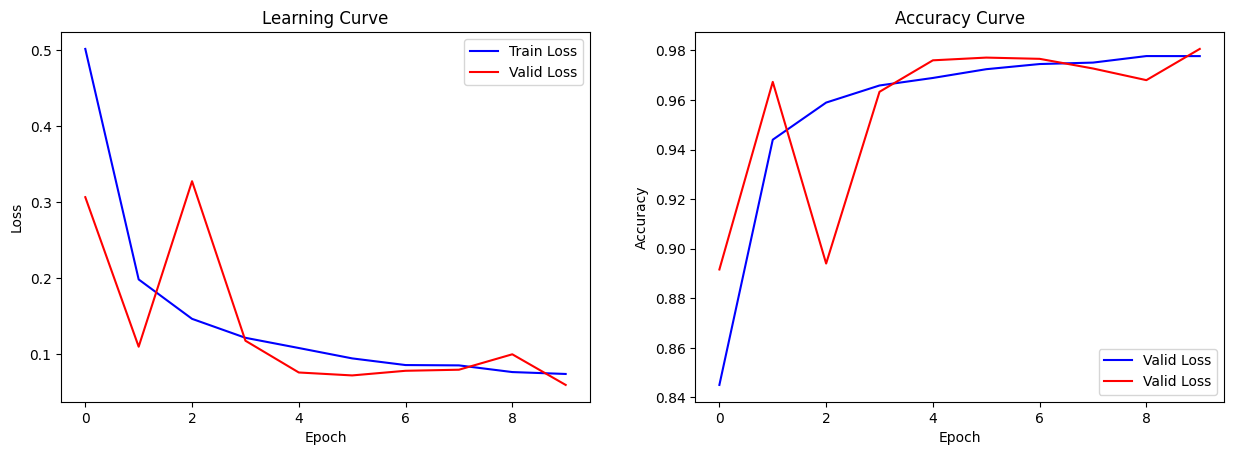

In [113]:
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)

axs[0].plot(train_loss_hist, c='b', label='Train Loss')
axs[0].plot(valid_loss_hist, c='r', label='Valid Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Learning Curve')

axs[1].plot(train_acc_hist, c='b', label='Valid Loss')
axs[1].plot(valid_acc_hist, c='r', label='Valid Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].set_title('Accuracy Curve')